In [1]:
import warnings
warnings.filterwarnings("ignore")



radar = pyart.io.read('/Volumes/scr1/26Apr_2016/KLSX20160426_183137_V06')
radar = pyart.io.read('KDDC20160525_001527_V06.gz')

radar = pyart.io.read('KDDC20160524_181120_V06.gz')

radar = pyart.io.read('/Volumes/scr1/26Apr_2016/KLSX20160426_183137_V06')




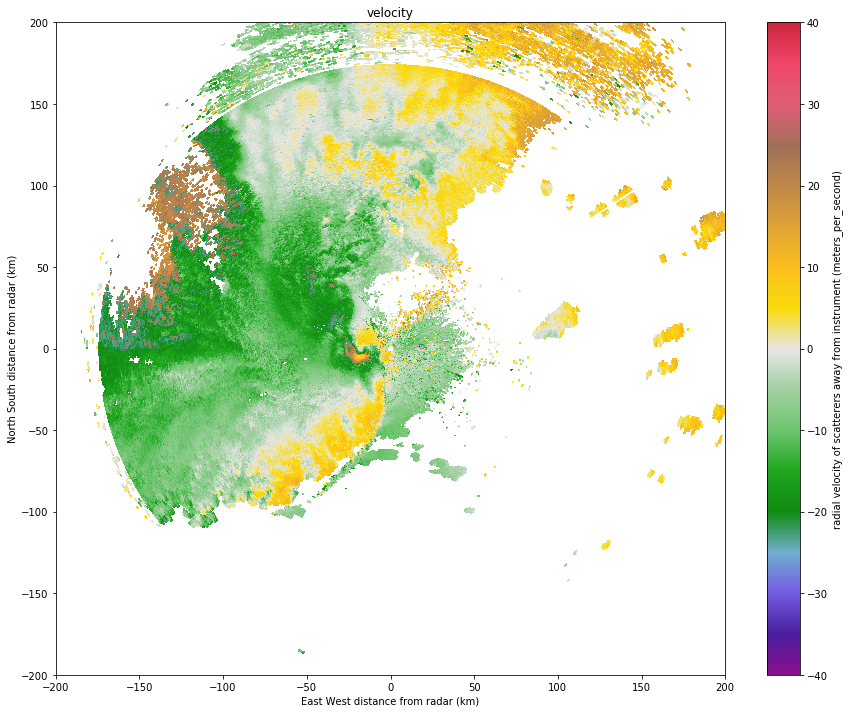

In [2]:
display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize = [15,12])
ax = fig.add_subplot(1,1,1)
display.plot('velocity', 1, title='velocity',
                    mask_outside = False,
                    cmap = pyart.graph.cm.Carbone17,
                    vmin = -40, vmax = 40, ax=ax)
display.set_limits(xlim=(-200, 200), ylim=(-200,200), ax=ax)
plt.show()










In [3]:
for n, slice in enumerate(radar.iter_slice()):
    nyq = radar.instrument_parameters['nyquist_velocity']['data'][slice]
    print("Shape of nyquist:  %d" % nyq.shape)
    print("B->Max/Min of nyquist:  %f   %f" % (nyq.max(), nyq.min()))
    print("Mean of nyquist:  %f" % nyq.mean())
    radar.instrument_parameters['nyquist_velocity']['data'][slice] = nyq.min()
    nyq = radar.instrument_parameters['nyquist_velocity']['data'][slice]
    print("A->Max/Min of nyquist:  %f   %f" % (nyq.max(), nyq.min()))



Shape of nyquist:  720
B->Max/Min of nyquist:  8.920000   8.920000
Mean of nyquist:  8.919999
A->Max/Min of nyquist:  8.920000   8.920000
Shape of nyquist:  720
B->Max/Min of nyquist:  35.520000   23.750000
Mean of nyquist:  28.719555
A->Max/Min of nyquist:  23.750000   23.750000
Shape of nyquist:  720
B->Max/Min of nyquist:  8.920000   8.920000
Mean of nyquist:  8.919999
A->Max/Min of nyquist:  8.920000   8.920000
Shape of nyquist:  720
B->Max/Min of nyquist:  35.520000   23.750000
Mean of nyquist:  28.752249
A->Max/Min of nyquist:  23.750000   23.750000
Shape of nyquist:  720
B->Max/Min of nyquist:  8.920000   8.920000
Mean of nyquist:  8.919999
A->Max/Min of nyquist:  8.920000   8.920000
Shape of nyquist:  720
B->Max/Min of nyquist:  35.520000   23.750000
Mean of nyquist:  28.768595
A->Max/Min of nyquist:  23.750000   23.750000
Shape of nyquist:  720
B->Max/Min of nyquist:  8.920000   8.920000
Mean of nyquist:  8.919999
A->Max/Min of nyquist:  8.920000   8.920000
Shape of nyquist:  

In [13]:
vr_unfold = pyart.correct.unwrap.dealias_unwrap_phase(radar, unwrap_unit='sweep', nyquist_vel=None, 
                                          check_nyquist_uniform=True, 
                                          gatefilter=False, rays_wrap_around=None, 
                                          keep_original=True, set_limits=True, vel_field=None, 
                                          corr_vel_field=None, 
                                          skip_checks=True)
radar.add_field('velocity_phase', 
                      vr_unfold, replace_existing = True)




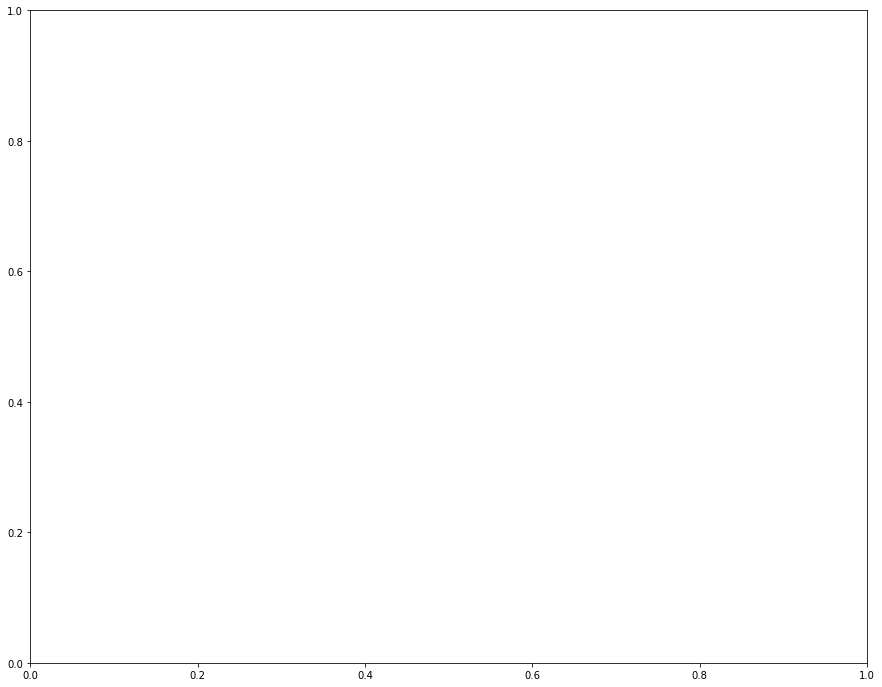

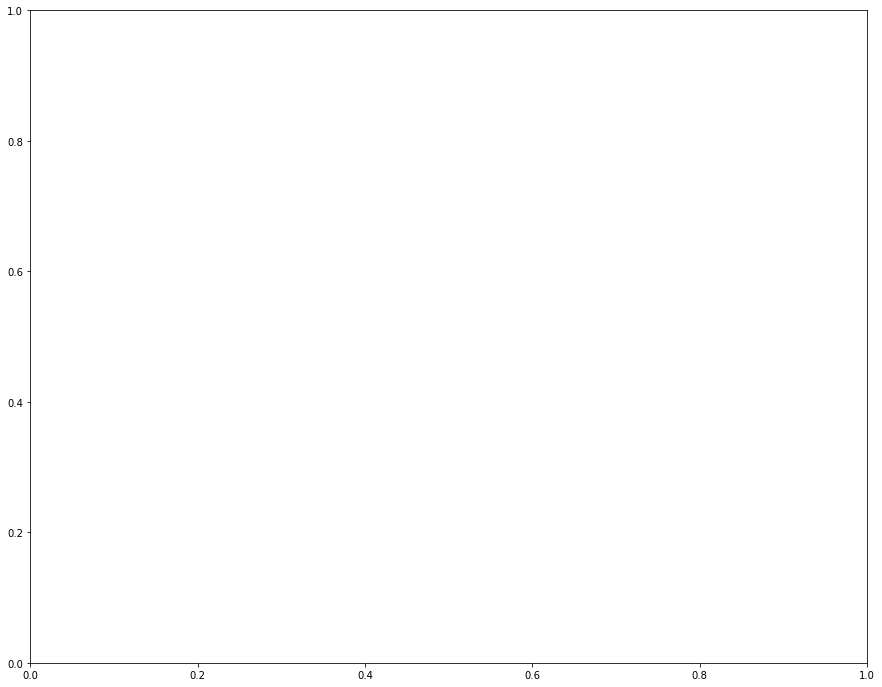

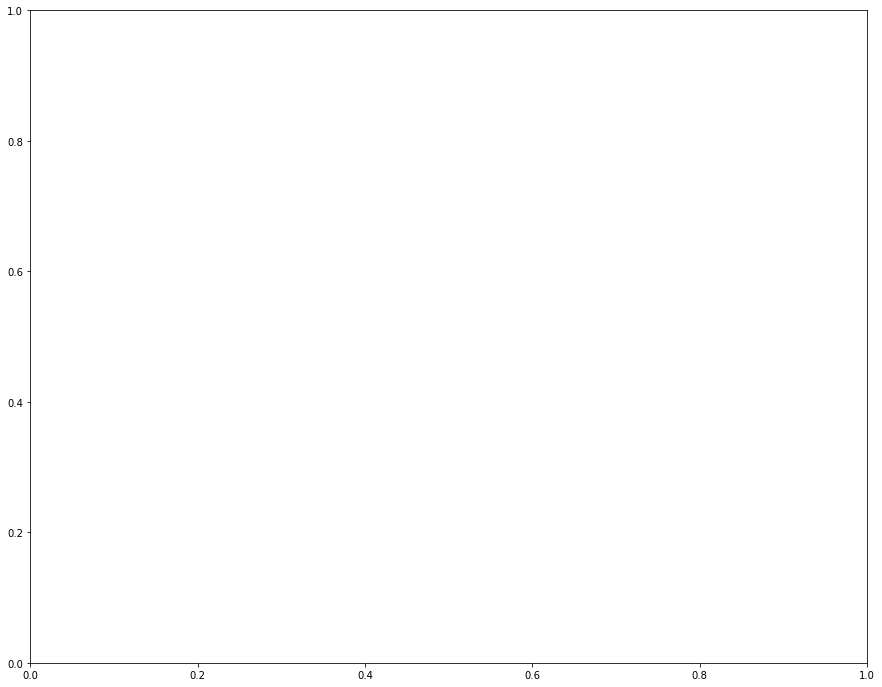

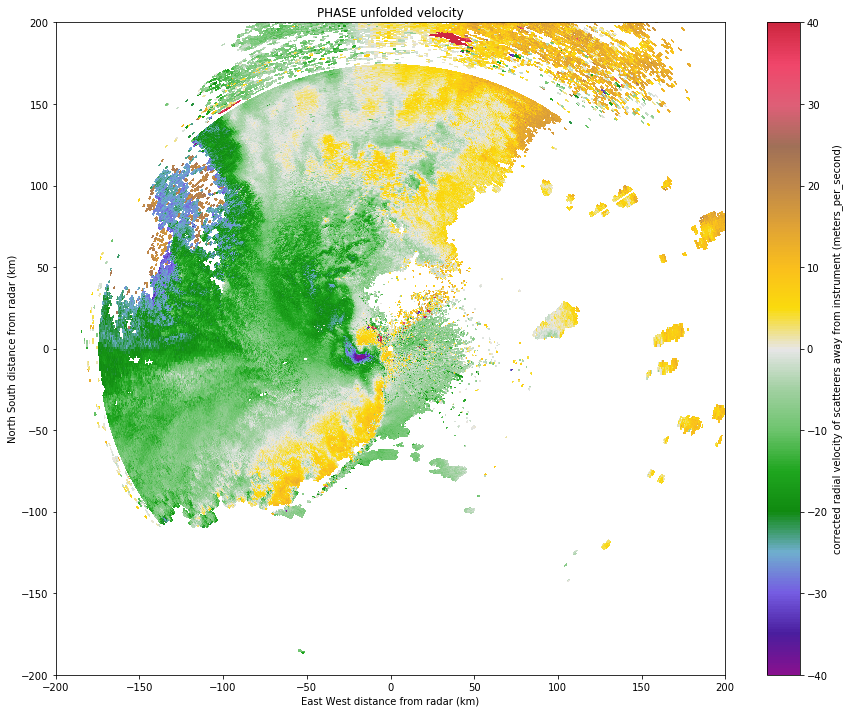

In [15]:
fig = plt.figure(figsize = [15,12])
ax = fig.add_subplot(1,1,1)
display.plot('velocity_phase', 1, title='PHASE unfolded velocity',
                    mask_outside = False,
                    cmap = pyart.graph.cm.Carbone17,
                    vmin = -40, vmax = 40, ax=ax)
display.set_limits(xlim=(-200, 200), ylim=(-200, 200), ax=ax)
plt.show()



In [18]:
vr_unfold = pyart.correct.region_dealias.dealias_region_based(radar, nyquist_vel=None,
                                          check_nyquist_uniform=True,
                                          gatefilter=False, rays_wrap_around=None,
                                          keep_original=True, set_limits=True, vel_field=None,
                                          corr_vel_field=None,
                                          skip_checks=True)

radar.add_field('velocity_region', 
                      vr_unfold, replace_existing = True)




[8.920000076293945, 23.75, 8.920000076293945, 23.75, 8.920000076293945, 23.75, 8.920000076293945, 23.75, 23.75, 23.75, 23.75, 8.920000076293945, 23.75, 23.75, 23.75, 23.75, 30.329999923706055, 8.920000076293945, 23.75, 32.720001220703125, 35.52000045776367, 35.52000045776367, 35.52000045776367]


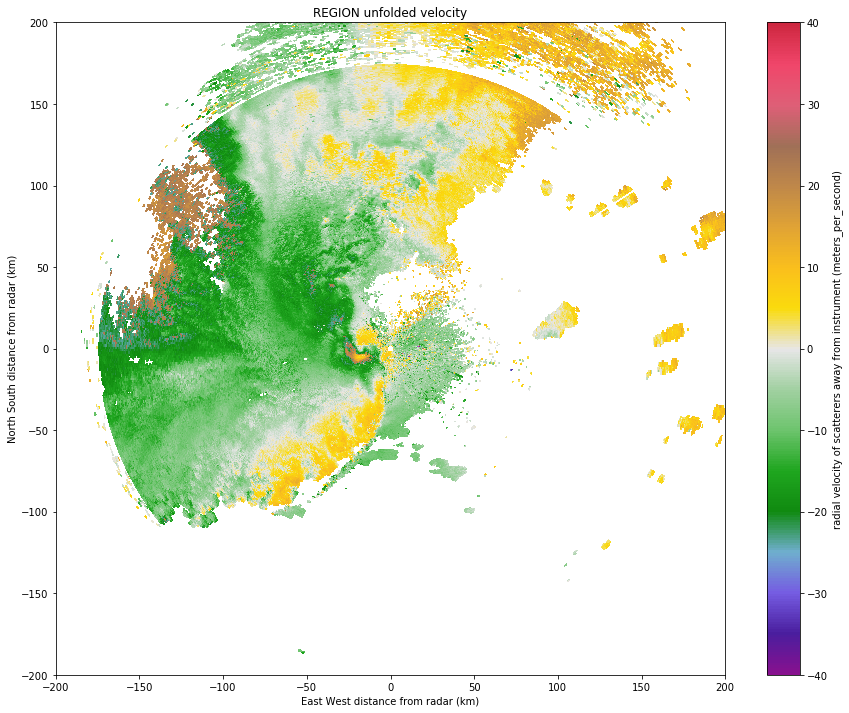

In [27]:
fig = plt.figure(figsize = [15,12])
ax = fig.add_subplot(1,1,1)
display.plot('velocity', 1, title='REGION unfolded velocity',
                    mask_outside = False,
                    cmap = pyart.graph.cm.Carbone17,
                    vmin = -40, vmax = 40, ax=ax)
display.set_limits(xlim=(-200, 200), ylim=(-200, 200), ax=ax)
plt.show()